In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


dataset_dir = 'Dataset/'


img_size = (128, 128)
input_shape = img_size + (3,)


batch_size = 32
epochs = 100
learning_rate = 0.001

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

def create_cnn_model(input_shape):
    inputs = Input(shape=input_shape)

    # Submodel 1
    x1 = Conv2D(64, (3, 3), activation='relu')(inputs)
    x1 = BatchNormalization()(x1)
    x1 = MaxPooling2D((2, 2))(x1)
    
    x1 = Conv2D(64, (3, 3), activation='relu')(x1)
    x1 = BatchNormalization()(x1)
    x1 = MaxPooling2D((2, 2))(x1)
    
    x1 = Flatten()(x1)

    # Submodel 2
    x2 = Conv2D(64, (3, 3), activation='relu')(inputs)
    x2 = BatchNormalization()(x2)
    x2 = MaxPooling2D((2, 2))(x2)
    
    x2 = Conv2D(64, (3, 3), activation='relu')(x2)
    x2 = BatchNormalization()(x2)
    x2 = MaxPooling2D((2, 2))(x2)
    
    x2 = Flatten()(x2)

    
    x = Concatenate()([x1, x2])

    
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    # Output layer
    outputs = Dense(7, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model


model = create_cnn_model(input_shape)


model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])




Found 788 images belonging to 7 classes.
Found 193 images belonging to 7 classes.


In [4]:

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
#early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

Epoch 1/100


c:\Users\vinay\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 733ms/step - accuracy: 0.3428 - loss: 38.4169 - val_accuracy: 0.1658 - val_loss: 3.5428
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 698ms/step - accuracy: 0.6584 - loss: 1.5980 - val_accuracy: 0.0570 - val_loss: 9.3552
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 695ms/step - accuracy: 0.7121 - loss: 1.1911 - val_accuracy: 0.1658 - val_loss: 6.4722
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 700ms/step - accuracy: 0.7275 - loss: 0.7947 - val_accuracy: 0.1606 - val_loss: 7.3847
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 700ms/step - accuracy: 0.7904 - loss: 0.7678 - val_accuracy: 0.1244 - val_loss: 10.9322
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 698ms/step - accuracy: 0.7745 - loss: 0.6314 - val_accuracy: 0.1554 - val_loss: 9.5076
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 705ms/step - accuracy: 0.7420 - loss: 0.7499 - val_accuracy: 0.1813 - val_loss: 7.0209
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 699ms/step - accuracy: 0.8103 - loss: 0.5681 - val_accura

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step 


<Figure size 1000x800 with 0 Axes>

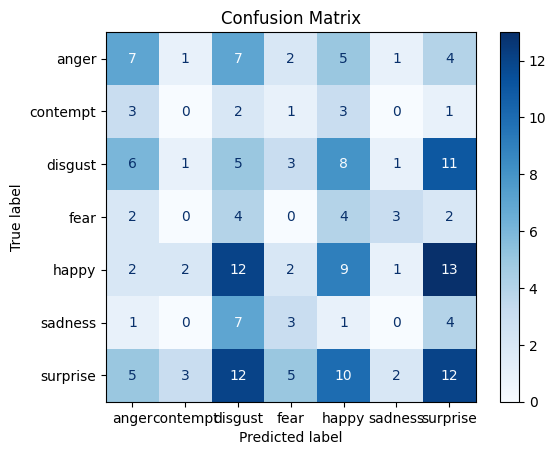

Classification Report:
               precision    recall  f1-score   support

       anger       0.27      0.26      0.26        27
    contempt       0.00      0.00      0.00        10
     disgust       0.10      0.14      0.12        35
        fear       0.00      0.00      0.00        15
       happy       0.23      0.22      0.22        41
     sadness       0.00      0.00      0.00        16
    surprise       0.26      0.24      0.25        49

    accuracy                           0.17       193
   macro avg       0.12      0.12      0.12       193
weighted avg       0.17      0.17      0.17       193



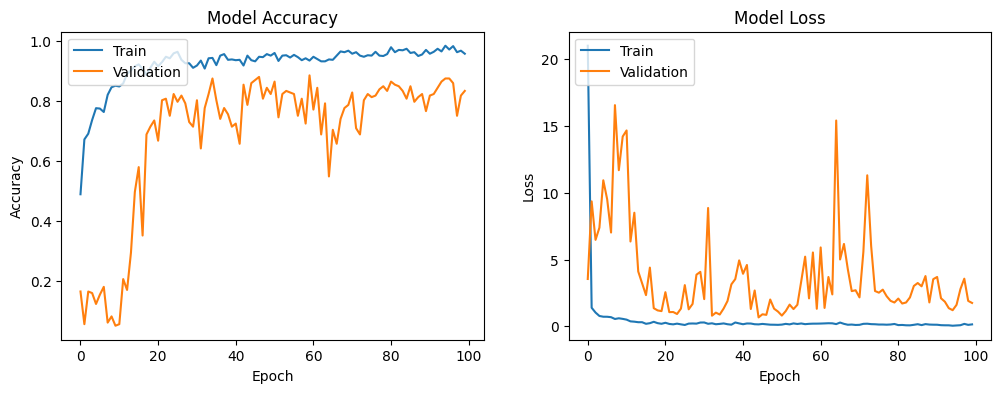

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

# Evaluate model on validation data
val_predictions = model.predict(validation_generator)
val_pred_classes = np.argmax(val_predictions, axis=1)
val_true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Generate confusion matrix
conf_matrix = confusion_matrix(val_true_classes, val_pred_classes)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(val_true_classes, val_pred_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
